# Class 5 - Logistic regression

## Logistic regression: the model

#### From regression to classification

In the previous two classes we have seen how to solve regression problems, in which we had to predict a continuous output, i.e. our setting was $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Y} = \mathbb{R}$. Today we will see how to solve problems of binary **classification**, in which we are interested in correctly predicting if a given input in $\mathcal{X} = \mathbb{R}^d$ belongs to one of two classes (i.e. $\mathcal{Y} = \{0,1\}$). 

Today we will present **logistic regression**, which is one of the possible models that can be used to solve a binary classification problem and is conceptually close to linear regression. Of course we cannot just use linear regression for binary classification, because a linear regression model outputs response values in $\mathbb{R}$, while we want our response to be in $\{0,1\}$.

First of all, let's pass from affine models to linear models by adding one more feature (constant one) to our dataset ($x \mapsto (1, x)$). From now on $d$ will denote the dimension of our extended feature space.

A possible solution to our range problem is to compose the output of a linear regression with a function with a binary range, that is we could use the following hypothesis class:

$$\{x\mapsto \text{sign}\left(\langle w,x\rangle \right) \;\vert\; w\in\mathbb{R}^d\}$$

and claim that if the sign of our linear regression prediction is positive, then we will label the point $1$, while if the sign is negative, we will label it $0$. 

This hypothesis class is well known and particularly useful for so called linearly-separable problems (we will see more on this in a following class).

Logistic regression, instead, is based on the following choice of hypothesis class:

$$\{x\mapsto f_{w}(x) = \sigma\left(\langle w,x\rangle \right) \;\vert\; w \in \mathbb{R}^d\},$$

where $S$ is the **sigmoid** function, defined as

$$\sigma(x) = \frac{1}{1 + e^{-x}}.$$

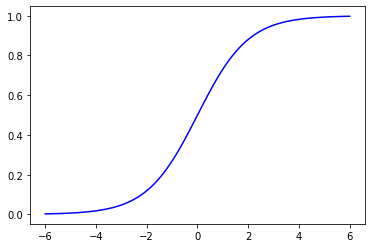

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6,6,1000)

plt.plot(x, 1/(1+np.exp(-x)), 'b-')
plt.show()

#### The maximum likelihood method

The output of our model will therefore not be binary, but it will lie in $[0,1]$ and we can then interpret it as the conditional probability that the correct labeling is $Y=1$, given that we observe $X=x$:

$$y = f_{w}(x) = \sigma\left(\langle w,x\rangle \right) = \mathbb{P}(Y = 1 | X = x).$$

Now, we want to choose our parameters ($w \in \mathbb{R}^{d}$), in such a way that this conditional probability is as close as possible to the real one, by using the information provided by our training dataset.

In the case of linear regression, we decided to find the parameters by minimizing a given loss function (squared error or absolute value loss) on our training dataset. This method worked very well analytically and/or computationally because that loss function was convex in the parameters, but in the case of logistic regression the non-linearity of the sigmoid function, $\sigma$, forces us to find another way.

We can fix our parameters by imposing that **the training dataset that we observe must have the maximum probability of occurring**, in other words we want to maximize the following function:



$$ \prod_{i=1}^n \mathbb{P}(Y=y_i, X=x_i) = \prod_{i=1}^n \mathbb{P}(Y=y_i | X=x_i) \mathbb{P}(X = x_i) \propto \prod_{i=1}^n \left(f_{w}(x_i)\right)^{y_i} \left(1 - f_{w}(x_i)\right)^{1 - y_i} =: L(w) $$

where $L(w)$ is known as the likelihood function and is proportional to the probability of observing our training dataset, under our working assumption that $f_{w}(x_i)$ must be the conditional probability.

Of course maximizing $L(w)$ is equivalent to maximizing its logarithm, so that our parameters, $w$, can be found by solving:

$$ \hat{w} = \underset{w \in \mathbb{R}^d}{\text{argmax}} \: \log L(w) = \underset{w \in \mathbb{R}^d}{\text{argmax}} \: \sum_{i=1}^n \left[ y_i \log\left(f_{w}(x_i)\right) + (1 - y_i) \log\left( 1 - f_{w}(x_i)\right) \right] $$

This method is known in statistics as Maximum Likelihood Estimation (MLE) and estimators generated via this method are known as MLE estimators.




goal: max y. y has nothing to do with x, P(X=xi) do not care

It is important to realize that the MLE method is entirely compatible with our Empirical Risk Miniminization theoretical framework. In fact maximizing the logarithm of the Maximum Likelihood function, $\log(L(w))$, is equivalent to minimizing the log-loss function, defined as follows:

$$ \tilde{L}(y, y') =   - \left[ y \log\left( y' \right) + (1 - y) \log\left( 1 - y'\right) \right], \quad y\in \{0,1\}, y' \in (0,1) $$

## Logistic Regression: the algorithm

#### Gradient descent implementation

The minimization can be performed via gradient descent. The gradient is easily computed as:

$$ \frac{\partial}{\partial w_k} \left( - \log L(w) \right) = - \sum_{i=1}^n x_i^{(k)} (y_i - f_{w}(x_i)) =: - \sum_{i=1}^n x_i^{(k)} z_i(w)  \quad \Rightarrow \quad \nabla \log L(w) = - X^T z(w), $$  

Therefore the iterating update rule for our gradient descent will look like:

$$ w^{\text{new}} = w^{\text{old}} - \alpha \left( - X^T z(w,b)\right),$$

where the gradients are taken with negative sign because the optimization problem at hand is a minimization.

#### Code implementation

In [7]:
def sigmoid(w, x):
    return 1 / (1 + np.exp(-w.dot(x)))

def log_likelihood(w, x, y):
    n = x.shape[0]
    result = np.zeros(n)
    for i in range(n):
        result[i] = - (1 - y[i,0]) * w.dot(x[i,:]) - np.log(1 + np.exp(-w.dot(x[i,:]))) 
        # the previous line is equivalent to:
        # result[i] = y[i,0] * np.log(sigmoid(w, x[i,:])) + (1 - y[i,0]) * np.log(1 - sigmoid(w, x[i,:]))
    return sum(result)

In [8]:
def logistic_regression_train(x, y, alpha=None):
    
    n, d = x.shape
    b = 0
    w = np.zeros(d)
    cost_old = 0
    cost_new = log_likelihood(w, x, y) 
    i = 0
    while np.abs(cost_new - cost_old) > 10 ** (-4):
        print(i)
        print(cost_new)
        z = y - np.array([sigmoid(w, row) for row in x]).reshape((n,1))
        gradient = - np.transpose(x).dot(z).reshape((d,))
        alpha = (np.transpose(gradient).dot(gradient)) / (
            (np.transpose(gradient).dot(np.transpose(x))).dot(x.dot(gradient)))
        w = w - alpha * gradient
        cost_new, cost_old = log_likelihood(w, x, y) , cost_new
        i = i + 1
    print("Iterations: {}".format(i))
    return w


def logistic_regression_predict_label(w, x):
    n = x.shape[0]
    predictions = np.zeros((n, 1))
    for i in range(n):
        prob = sigmoid(w, x[i,:])
        if prob >= 0.5:
            predictions[i,0] = 1
        else:
            predictions[i,0] = 0
    return predictions

def logistic_regression_predict_prob(w, x):
    n = x.shape[0]
    predictions = np.zeros((n, 1))
    for i in range(n):
        predictions[i,0] = sigmoid(w, x[i,:])
    return predictions

## Logistic regression: practical implementation

Now we are ready to implement logistic regression on a binary classification problem. The only thing we need is a problem.

#### Dataset acquisition: how to read text

We are going to work on the **Titanic dataset**. This is an online dataset ([see here](https://www.kaggle.com/c/titanic/data) for an online repository) that contains data about the passengers of the Titanic, together with the information whether they survived or not. The goal is to predict, as well as possible, the fate of each passanger by using the information provided.

The dataset comes as a csv file (comma-separated values file), which looks as follows:

    PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked  
    1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S  
    2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C  
    3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S  
    ...

If you save the file in the same folder as your Jupyter notebook or python code, your program can access it via several possible python functions. 

We will use the most basic (and reliable) method, which is via the csv.reader function of the csv package.

In [10]:
import csv

# open data set with name f
with open('/Users/wwyvette/Desktop/train.csv', 'r') as f:
    data = csv.reader(f)

    row = data.__next__()    # first_line = fid.read_line()
    features_names = np.array(row)

    x = []
    y = []

    for row in data:
        x.append(row)          #feathers name
        y.append(row[1])       # put in position 1

    x = np.array(x)
    y = np.array(y)

print(x.shape)
print(y.shape)

(891, 12)
(891,)


We can have an idea of the dataset by printing the header (which contains the names of the columns) and the first line:

In [11]:
print(features_names)
print(x[0,:])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
 '7.25' '' 'S']


#### Feature selection

The features are as follows:

0. '**PassengerId**': a progressive numbering of the passangers (integer)
1. '**Survived**': survival status (integer: 0 if dead, 1 if survived)
2. '**Pclass**': passenger class (integer: 1, 2, or 3 if 1st, 2nd, or 3rd class respectively)
3. '**Name**': name of the passenger (string)
4. '**Sex**': gender of the passenger (string: 'male' or 'female')
5. '**Age**': age of the passanger (integer)
6. '**SibSp**': number of siblings/spouses on board (integer)
7. '**Parch**': number of parents/children on board (integer)
8. '**Ticket**': string specifying the ticket code (alphanumeric string)
9. '**Fare**': cost of the ticket (float)
10. '**Cabin**': personal cabin number  (alphanumeric string)
11. '**Embarked**': port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

We notice that:

+ the 'Survived' column is the column of our labels, it's not a feature!
+ some features can be meaningful, but cannot be readily translated into real numbers,
+ not all features appear to be useful.

We decide to limit ourselves to the following features:

In [6]:
x = x[:, [2, 4, 5, 6, 7, 9]]
features_names = features_names[[2, 4, 5, 6, 7, 9]]
print(features_names)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']


#### Feature representation

Our (restricted) dataset now looks like this:

In [7]:
print(x)

[['3' 'male' '22' '1' '0' '7.25']
 ['1' 'female' '38' '1' '0' '71.2833']
 ['3' 'female' '26' '0' '0' '7.925']
 ...
 ['3' 'female' '' '1' '2' '23.45']
 ['1' 'male' '26' '0' '0' '30']
 ['3' 'male' '32' '0' '0' '7.75']]


We must turn the gender feature into a categorical one (0 and 1).

In [8]:
x[:,1] = (x[:,1] == 'female').astype(np.float)
print(x)

[['3' '0.0' '22' '1' '0' '7.25']
 ['1' '1.0' '38' '1' '0' '71.2833']
 ['3' '1.0' '26' '0' '0' '7.925']
 ...
 ['3' '1.0' '' '1' '2' '23.45']
 ['1' '0.0' '26' '0' '0' '30']
 ['3' '0.0' '32' '0' '0' '7.75']]


And we try to convert all data to type float, so we can work with "real" numbers.

#### Data imputation

The conversion to float fails because some features have no value (represented in text usually as '', 'NaN', or 'NA'). We can search for the culprit in the following way:

In [9]:
for i in range(len(features_names)):
    if any(x[:,i] == ''):
        print("Feature", i, "has", sum(x[:,i] == ''), "NaN value(s)")

Feature 2 has 177 NaN value(s)


We can deal with missing data in one of the following ways:
+ Remove the datapoint (not good if the dataset is small)
+ Use a machine learning algorithm that accepts missing features (but that's not the case of logistic regression)
+ **Data imputation** techniques, i.e. substitute the NaN with a plausible value: 
    + the mean over non-NaN data of same feature, 
    + the mid-point of the range of non-NaN data range for same feature, 
    + the prediction of a regression problem run on the remaining features to predict missing feature.

We choose the simplest solution and substitute the missing value with the mean value of the feature:

In [10]:
ages = x[:,2]
mean_age = np.mean(x[ages != '',2].astype(np.float))
x[ages == '', 2] = mean_age

print(x)

[['3' '0.0' '22' '1' '0' '7.25']
 ['1' '1.0' '38' '1' '0' '71.2833']
 ['3' '1.0' '26' '0' '0' '7.925']
 ...
 ['3' '1.0' '29.69911764705882' '1' '2' '23.45']
 ['1' '0.0' '26' '0' '0' '30']
 ['3' '0.0' '32' '0' '0' '7.75']]


In [11]:
x = x.astype(np.float)
y = y.astype(np.float).reshape((x.shape[0],1))

x = np.hstack((np.ones((x.shape[0],1)), x))

print(x)
print(x.shape)

[[ 1.      3.      0.     ...  1.      0.      7.25  ]
 [ 1.      1.      1.     ...  1.      0.     71.2833]
 [ 1.      3.      1.     ...  0.      0.      7.925 ]
 ...
 [ 1.      3.      1.     ...  1.      2.     23.45  ]
 [ 1.      1.      0.     ...  0.      0.     30.    ]
 [ 1.      3.      0.     ...  0.      0.      7.75  ]]
(891, 7)


In [12]:
print(y.shape)

(891, 1)


[[ 1.      3.      0.     ...  1.      0.      7.25  ]
 [ 1.      1.      1.     ...  1.      0.     71.2833]
 [ 1.      3.      1.     ...  0.      0.      7.925 ]
 ...
 [ 1.      3.      1.     ...  1.      2.     23.45  ]
 [ 1.      1.      0.     ...  0.      0.     30.    ]
 [ 1.      3.      0.     ...  0.      0.      7.75  ]]


#### Training

As usual we shuffle the dataset and partition it into a training dataset and a testing dataset.

In [14]:
def shuffle(x, y):
    z = np.hstack((x, y))
    np.random.shuffle(z)
    return np.hsplit(z, [x.shape[1]])

x, y = shuffle(x, y)

def splitting(x, y, test_size=0.2):
    n = x.shape[0]
    train_size = int(n * (1 - test_size))
    return x[:train_size, ], x[train_size:, ], y[:train_size, ], y[train_size:, ]

x_train, x_test, y_train, y_test = splitting(x, y)

[[ 1.      3.      1.     ...  1.      0.     14.4542]
 [ 1.      1.      0.     ...  1.      0.     66.6   ]
 [ 1.      3.      0.     ...  0.      0.      7.25  ]
 ...
 [ 1.      3.      0.     ...  0.      0.      7.25  ]
 [ 1.      3.      0.     ...  0.      0.      7.775 ]
 [ 1.      1.      0.     ...  0.      0.     49.5042]]


We train our logistic regression:

In [15]:
logistic_coeff = logistic_regression_train(x_train, y_train)

0
-493.5207925586822
1
-481.60492252336087
2
-470.86804588773794
3
-464.5608370430776
4
-460.7021632682713
5
-458.25794860741814
6
-456.6564716067392
7
-455.5767318729713
8
-454.83021979706797
9
-454.3021512509069
10
-453.9202939258496
11
-453.6378294907931
12
-453.4235346080015
13
-453.2558959919247
14
-453.1193360792482
15
-453.0013715982147
16
-452.88931176430503
17
-452.7617333024283
18
-452.5296331345199
19
-439.38292615183207
20
-439.33982891763657
21
-439.283622197487
22
-439.2127748329647
23
-439.12462570116963
24
-438.92755214697706
25
-437.63559532733154
26
-437.6109881077272
27
-437.5757598065942
28
-437.51033239453847
29
-437.38132817553407
30
-437.2624250989261
31
-437.24452834082257
32
-437.1900190708795
33
-437.1461206261347
34
-437.0580284822467
35
-437.0376952319367
36
-436.92182602650905
37
-436.9054568344394
38
-436.8686523951872
39
-436.6749561815278
40
-436.66113840317695
41
-436.64480412171935
42
-436.6073704694482
43
-436.44165556548757
44
-436.42766935125513
45


355
-357.3155208050611
356
-357.3129525722931
357
-357.310121958019
358
-357.30504876309385
359
-357.05615428298836
360
-357.0459528716408
361
-357.03328493336676
362
-357.01748988630493
363
-356.9697612987722
364
-356.93081175518455
365
-356.92752863806083
366
-356.9177594196862
367
-356.9112142927026
368
-356.86992650278364
369
-356.8674574806805
370
-356.8649273247759
371
-356.8613595412838
372
-356.8403189189816
373
-356.83761190045686
374
-356.8324538824941
375
-356.2142152541451
376
-356.20106609206516
377
-356.19130819063423
378
-356.18400139957475
379
-356.1784628589764
380
-356.17419195904915
381
-356.1708147709141
382
-356.1680392946796
383
-356.1656095106059
384
-356.16322345216554
385
-356.16020925413136
386
-356.1511065243125
387
-356.1435603229925
388
-356.1290020713285
389
-356.12548864509967
390
-356.102525095724
391
-356.09997001496146
392
-356.09558809756044
393
-355.6959285384934
394
-355.68697774817815
395
-355.6801809774601
396
-355.6749666343763
397
-355.670904189

707
-343.28592093595887
708
-343.27507995110096
709
-343.27360361109015
710
-343.2705627105692
711
-343.20544295947263
712
-343.20351956652445
713
-343.201949199777
714
-343.2006001794775
715
-343.199335226017
716
-343.19792386460887
717
-343.1954221422024
718
-342.5422437933715
719
-342.5280956613372
720
-342.5174710778883
721
-342.509452797927
722
-342.5033531210102
723
-342.49865480541615
724
-342.4949645132072
725
-342.4919737523958
726
-342.4894192880562
727
-342.4870207318968
728
-342.48429235459014
729
-342.4795096119823
730
-342.4734350186197
731
-342.46051156430474
732
-342.458735966278
733
-342.4491604243677
734
-342.44765084736616
735
-342.44368294852313
736
-342.43621951255085
737
-342.4342995885338
738
-342.41752143017584
739
-342.41631612269686
740
-342.41484498790766
741
-342.4112624648514
742
-342.39988559200935
743
-342.39852834820107
744
-342.3959936752064
745
-340.64334476211917
746
-340.6201684589042
747
-340.6031030028683
748
-340.5904951030783
749
-340.58114602892

1058
-334.2265133679498
1059
-334.1557175876482
1060
-334.1540232138664
1061
-334.1526994519795
1062
-334.15164604403606
1063
-334.1507836972828
1064
-334.15004480242646
1065
-334.14935951099665
1066
-334.1486163988044
1067
-334.1474171302116
1068
-334.1365120061434
1069
-334.135644043974
1070
-334.1325051351171
1071
-334.1313545405428
1072
-334.0809071773028
1073
-334.0801026575258
1074
-334.0793904960019
1075
-334.07871063796273
1076
-334.07797163811745
1077
-334.07692989155044
1078
-334.07408469478236
1079
-334.069487554778
1080
-334.06868813203425
1081
-334.0657815460717
1082
-334.0643709788635
1083
-334.03263797083406
1084
-334.03183105106825
1085
-334.03115715664285
1086
-334.03056545087566
1087
-334.02999961085993
1088
-334.02936055573525
1089
-334.02825486709634
1090
-333.98752746102053
1091
-333.98673454794294
1092
-333.98606035849105
1093
-333.9854532316948
1094
-333.9848512824891
1095
-333.9841334916625
1096
-333.9827764373667
1097
-333.96902231815534
1098
-333.965690251975


1394
-328.5056733319443
1395
-328.50546297603444
1396
-328.50522758977655
1397
-328.50483790179953
1398
-328.4973258207068
1399
-328.4970836773841
1400
-328.49686780980744
1401
-328.4966572260646
1402
-328.4964115475861
1403
-328.49594733799324
1404
-327.53277991896545
1405
-327.5325996052555
1406
-327.53243909737427
1407
-327.53228339471343
1408
-327.5321046725486
1409
-327.53178665596766
1410
-327.506311794793
1411
-327.5058212559264
1412
-327.50543616029125
1413
-327.50513034539654
1414
-327.5048834440236
1415
-327.5046791946958
1416
-327.50450380770525
1417
-327.50434377449966
1418
-327.5041809008697
1419
-327.5039711612792
1420
-327.5033847847852
1421
-327.502616554866
1422
-327.50216814431565
1423
-327.49941897016123
1424
-327.4992655867965
1425
-327.4990896251399
1426
-327.49877891707143
1427
-327.4804745395163
1428
-327.48012300817896
1429
-327.47984269954213
1430
-327.47961509358186
1431
-327.47942538052257
1432
-327.4792608989808
1433
-327.4791090097224
1434
-327.478952207858

We define two loss functions:

+ the 0-1 loss (percentage of wrong labels)
+ the log-loss (as defined above)

In [16]:
def zero_one_loss(y_true, y_pred):
    n = y_true.shape[0]
    return (1/n) * np.sum(y_true != y_pred)

In [17]:
def log_loss(y_true, y_pred):
    return np.mean(- (y_true*(np.log(y_pred)) + (1 - y_true)*(np.log(1 - y_pred))))    

We test our model on the test dataset:

In [18]:
train_predicted_labels = logistic_regression_predict_label(logistic_coeff, x_train)
train_predicted_prob = logistic_regression_predict_prob(logistic_coeff, x_train)
test_predicted_labels = logistic_regression_predict_label(logistic_coeff, x_test)
test_predicted_prob = logistic_regression_predict_prob(logistic_coeff, x_test)

print('Train 0-1 loss:', zero_one_loss(y_train, train_predicted_labels))
print('Train log-loss:', log_loss(y_train, train_predicted_prob))
print('-----------------------------------------------------------------------')
print('Test 0-1 loss:', zero_one_loss(y_test, test_predicted_labels))
print('Test log-loss:', log_loss(y_test, test_predicted_prob))

Train 0-1 loss: 0.20084269662921347
Train log-loss: 0.4579456679216699
-----------------------------------------------------------------------
Test 0-1 loss: 0.2011173184357542
Test log-loss: 0.42760070893492685


In [19]:
print(np.hstack((y_test, test_predicted_labels)))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 

We can compare this error with the implementation of logistic regression of the scikit-learn package:

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(x_train[:,1:], y_train.reshape(y_train.shape[0],))


train_predicted_labels = clf.predict(x_train[:,1:]).reshape(y_train.shape)
train_predicted_prob = (clf.predict_proba(x_train[:,1:])[:,1]).reshape(y_train.shape)
test_predicted_labels = clf.predict(x_test[:,1:]).reshape(y_test.shape)
test_predicted_prob = (clf.predict_proba(x_test[:,1:])[:,1]).reshape(y_test.shape)

print('Train 0-1 loss:', zero_one_loss(y_train, train_predicted_labels))
print('Train log-loss:', log_loss(y_train, train_predicted_prob))
print('-----------------------------------------------------------------------')
print('Test 0-1 loss:', zero_one_loss(y_test, test_predicted_labels))
print('Test log-loss:', log_loss(y_test, test_predicted_prob))

Train 0-1 loss: 0.20365168539325842
Train log-loss: 0.45277732746689425
-----------------------------------------------------------------------
Test 0-1 loss: 0.19553072625698326
Test log-loss: 0.41623301303648924


## Practice yourself!

Play around with the code yourself! Possible ideas that might lead you to interesting observations are:

1. Learn from our results! What features of our datasets are statistically significant for survival prediction?
2. Try the algorithms on the dataset for breast cancer diagnosis from scikit-learn (see [here](https://scikit-learn.org/stable/datasets/index.html)).
3. Try selecting more or less features. How is the model performance affected?
4. Try using different data imputation techniques to substitute the missing "Age" values.
5. Implement a logistic regression on the Titanic dataset, but this time choose a feature other than "Survived" as label.
6. Implement an algorithm similar to what we have seen for logistic regression, but on the following hypothesis class:
$$\{x\mapsto \text{sign}\left(\langle w,x\rangle \right) \;\vert\; w\in\mathbb{R}^d\}.$$